# Use Symphony to annotate myeloid cell subsets against reference

### Load necessary packages

In [21]:
import numpy as np
import seaborn as sns
import scanpy as sc
import symphonypy as sp
import matplotlib.pyplot as plt

### Load dataset

In [22]:
# load reference data 
mono_ref = sc.read_h5ad('./h5ad/mono_ref.h5ad')
dendri_ref = sc.read_h5ad('./h5ad/dendri_ref.h5ad')

# load query data
adata_query = sc.datasets.pbmc3k()

D:\software\anaconda\envs\scpy\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


### Preprocess query dataset

In [24]:
adata_query.raw = adata_query
sc.pp.normalize_total(adata_query, target_sum=1e5)
sc.pp.log1p(adata_query)
sc.pp.highly_variable_genes(adata_query)
print('CURRENT SHAPE', adata_query.shape)
    
sc.pp.scale(adata_query)
sc.tl.pca(adata_query, svd_solver="arpack")  
sc.pp.neighbors(adata_query, use_rep='X_pca')
sc.tl.umap(adata_query)
sc.tl.leiden(adata_query, resolution = 1)

D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


CURRENT SHAPE (2700, 32738)


D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


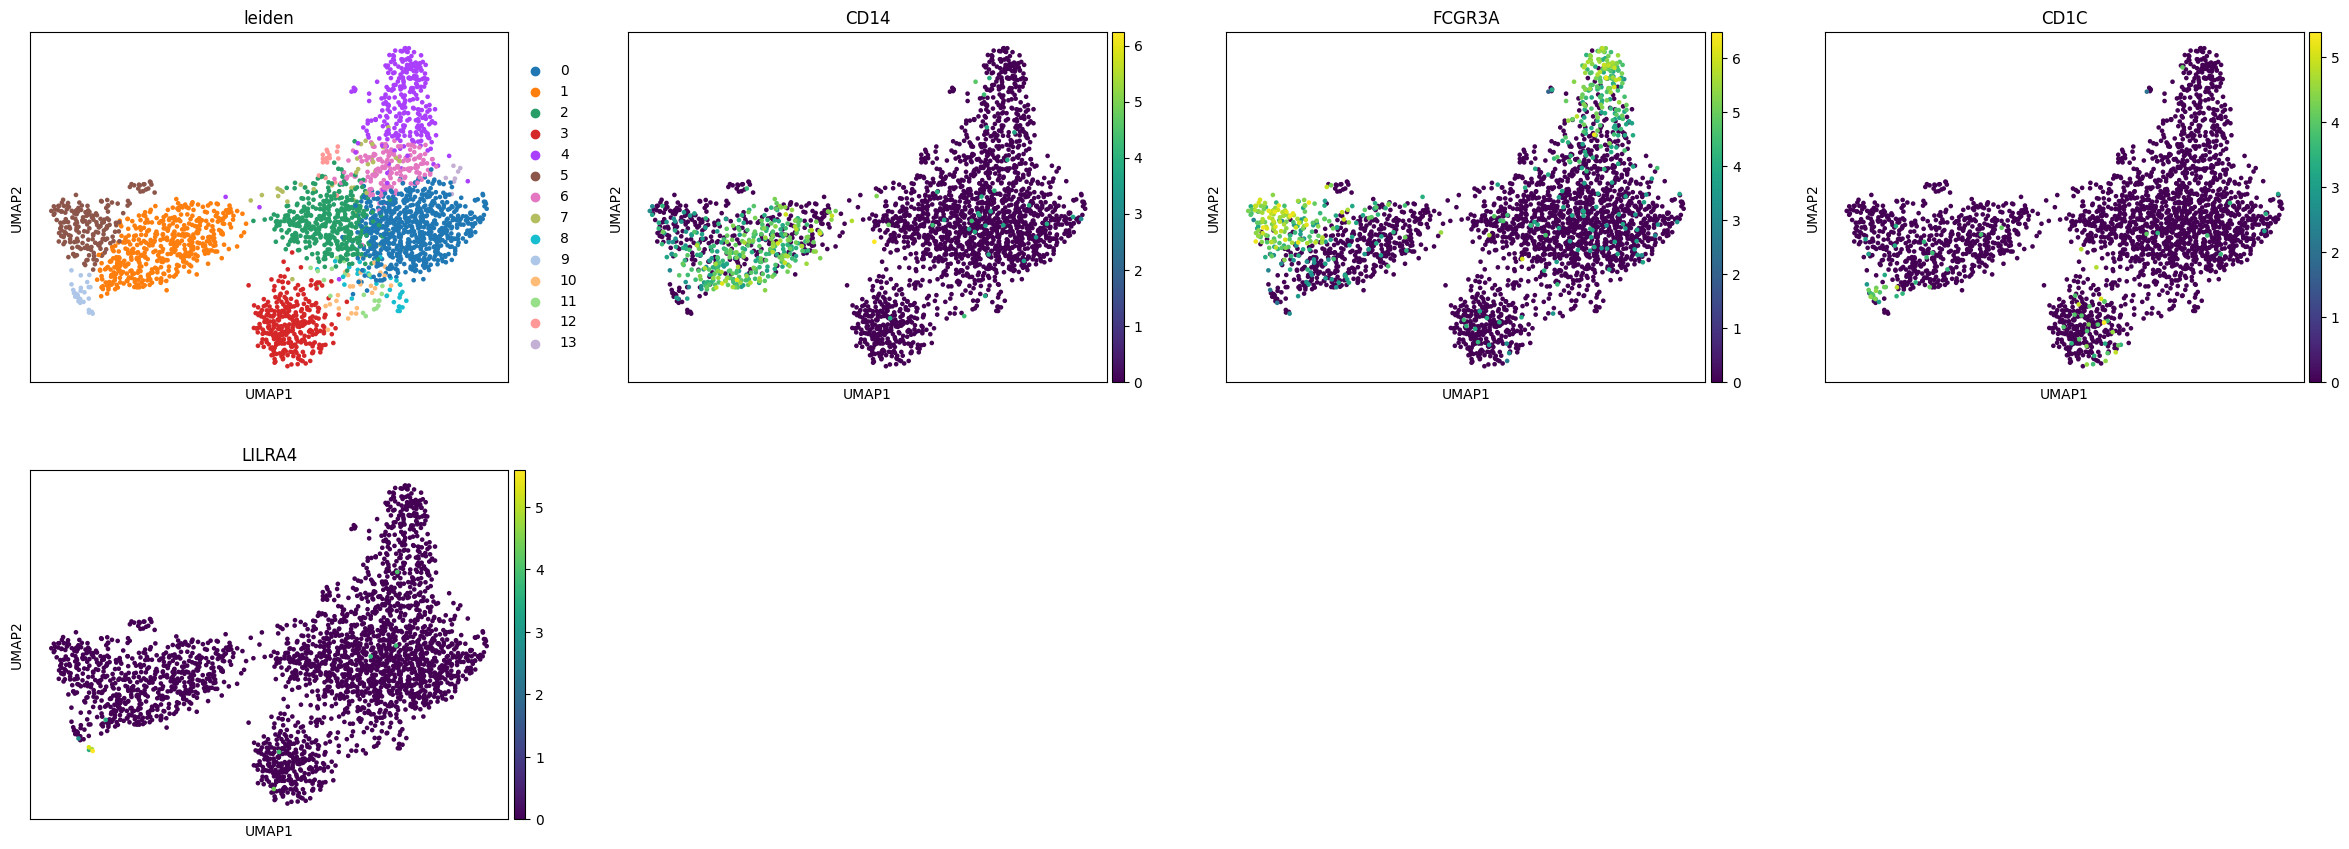

In [25]:
##### 
sc.pl.umap(adata_query, color = ['leiden', 'CD14', 'FCGR3A', 'CD1C', 'LILRA4'])

#### It can be seen that cluster 9 express dendritic cell markers, cluster 1,5 express monocyte markers. 
#### However, it is hard to recover the detailed myeloid cell subsets through unsupervised clustering due to the small sample size.  

### Map query data to reference data utilizing Symphony

In [26]:
### extract monocyte and dendritic cells 
target_cluster = ['1','5']
monocyte_query = adata_query[adata_query.obs['leiden'].isin(target_cluster), :]


target_cluster = ['9']
dendritic_query = adata_query[adata_query.obs['leiden'].isin(target_cluster), :]

#### Map monocytes
Map query monocytes to the reference data

In [33]:
############### Monocytes
## symphony procedure
sp.tl.map_embedding(adata_query = monocyte_query, adata_ref= mono_ref)
sp.tl.ingest(adata_query=monocyte_query, adata_ref=mono_ref)

sp.tl.transfer_labels_kNN(
    adata_query=monocyte_query,
    adata_ref=mono_ref,
    ref_labels=["level3_anno"], n_neighbors= 20
)

D:\software\anaconda\envs\scpy\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\software\anaconda\envs\scpy\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\software\anaconda\envs\sc

<Axes: title={'center': 'Reference dataset'}, xlabel='UMAP1', ylabel='UMAP2'>

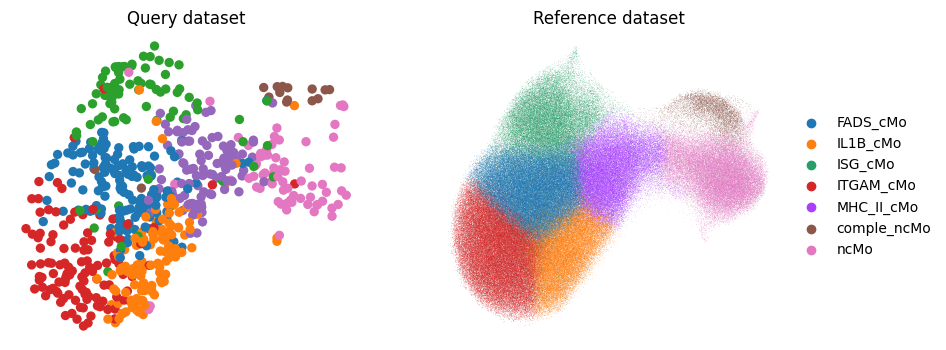

In [34]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

sc.pl.umap(
    monocyte_query,
    color = 'level3_anno',
    frameon=False,
    title="Query dataset",
    show=False,
    ax=axes[0],
    legend_loc=None,
)

sc.pl.umap(
    mono_ref,
    color="level3_anno",
    frameon=False,
    title="Reference dataset",
    ax=axes[1],
    show=False,
)



#### Map Dendritic cells
Map query dendritic cells to the reference data

In [43]:
############### Dendritic cells
## symphony procedure
sp.tl.map_embedding(adata_query = dendritic_query, adata_ref= dendri_ref)
sp.tl.ingest(adata_query=dendritic_query, adata_ref=dendri_ref)

sp.tl.transfer_labels_kNN(
    adata_query=dendritic_query,
    adata_ref=dendri_ref,
    ref_labels=["level3_anno"], n_neighbors= 20
)

D:\software\anaconda\envs\scpy\Lib\site-packages\symphonypy\tools.py:307: UserWarning: Not found `harmony` object in adata_ref.uns.
Assuming that adata_ref doesn't have any batches, and using 'X_pca' representation of adata_ref for clustering.
Otherwise, firstly run symphonypy.pp.harmony_integrate on adata_ref to account for them.
  warnings.warn(
D:\software\anaconda\envs\scpy\Lib\site-packages\symphonypy\_utils.py:304: ImplicitModificationWarning: Setting element `.obsm['X_pca_reference']` of view, initializing view as actual.
  adata_query.obsm[transferred_primary_basis] = np.array(
D:\software\anaconda\envs\scpy\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\software\anaconda\envs\scpy\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y

D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
D:\software\anaconda\envs\scpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
D:\software\anaconda\envs\sc

<Axes: title={'center': 'Reference dataset'}, xlabel='UMAP1', ylabel='UMAP2'>

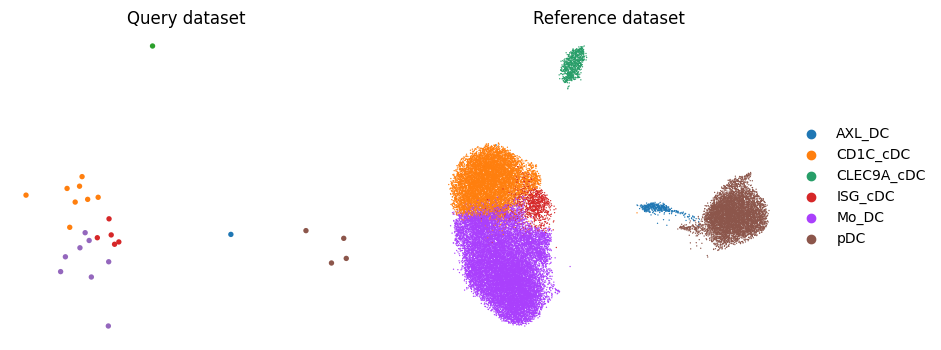

In [62]:
fig, axes = plt.subplots(figsize=(10, 4), ncols=2)

sc.pl.umap(
    dendritic_query,
    color = 'level3_anno',
    frameon=False,
    title="Query dataset",
    show=False,
    ax=axes[0],
    legend_loc=None, size = 60
)

sc.pl.umap(
    dendri_ref,
    color="level3_anno",
    frameon=False,
    title="Reference dataset",
    ax=axes[1],
    show=False,
)
